Analisis Dataset Water Potabilty dengan Metode Random Forest
Nama: Ilham Akbar:
NIM: 4112322005:

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Import dataset
data = pd.read_csv('/content/water_potability.csv')

# Menampilkan 5 baris pertama dari dataset
print(data.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [4]:
# Cek jumlah missing values dalam dataset
print("Missing values in dataset:\n", data.isnull().sum())

# Menghapus baris yang memiliki missing values
data_clean = data.dropna()

# Cek ulang apakah data sudah bersih
print("\nJumlah missing values setelah preprocessing:\n", data_clean.isnull().sum())

Missing values in dataset:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Jumlah missing values setelah preprocessing:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [5]:
# Menampilkan info dataset setelah preprocessing
print("\nInfo dataset setelah preprocessing:")
print(data_clean.info())

# Menampilkan statistik dasar dari dataset
print("\nStatistik deskriptif dari dataset:")
print(data_clean.describe())


Info dataset setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB
None

Statistik deskriptif dari dataset:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441374     7.134338   333.2

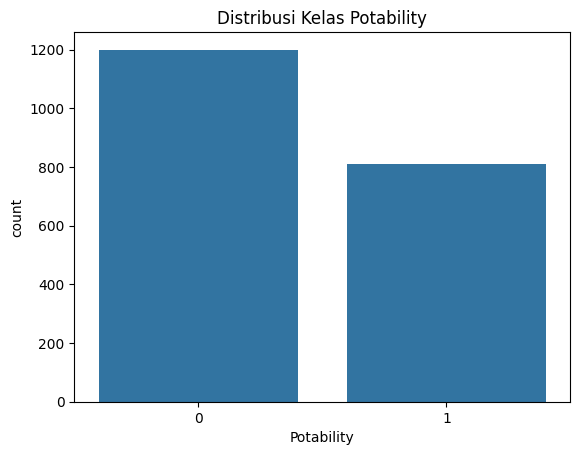

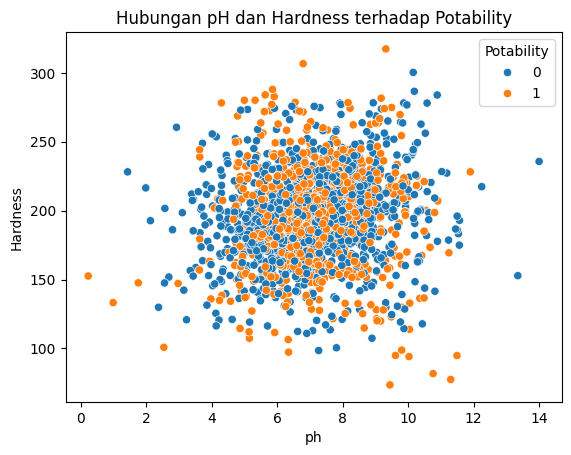

In [6]:
# Visualisasi distribusi kelas Potability (0 = Tidak Layak Minum, 1 = Layak Minum)
sns.countplot(x='Potability', data=data_clean)
plt.title('Distribusi Kelas Potability')
plt.show()

# Visualisasi distribusi pH dan Hardness terhadap Potability
sns.scatterplot(x='ph', y='Hardness', hue='Potability', data=data_clean)
plt.title('Hubungan pH dan Hardness terhadap Potability')
plt.show()

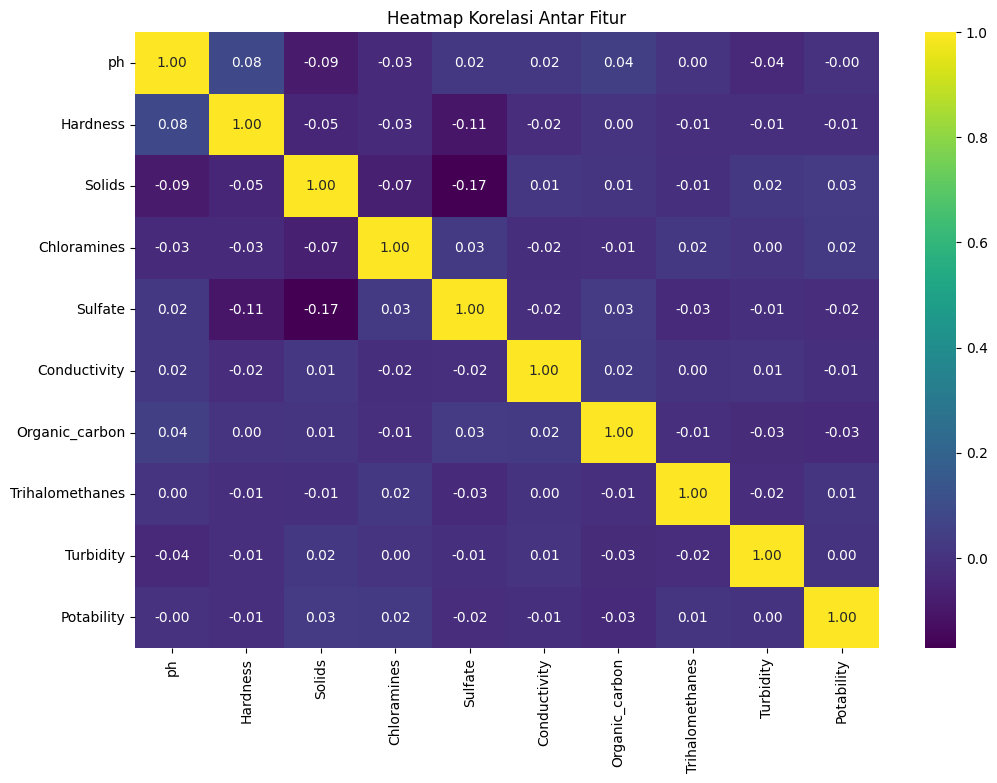

In [8]:
# Korelasi antar fitur dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

<ipython-input-15-2e0f5498eed3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Potability', y='Chloramines', data=data, palette='viridis')


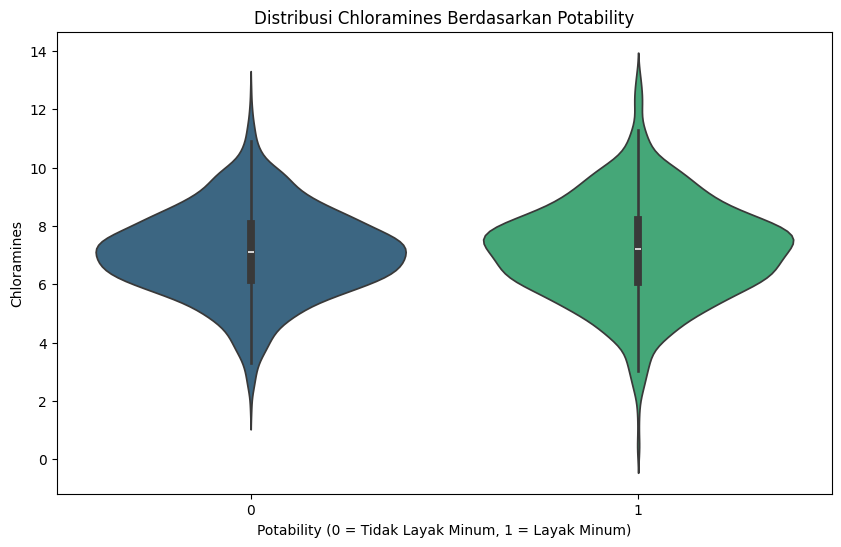

In [15]:
# Violin plot Chloramines berdasarkan Potability
plt.figure(figsize=(10, 6))
sns.violinplot(x='Potability', y='Chloramines', data=data, palette='viridis')
plt.title('Distribusi Chloramines Berdasarkan Potability')
plt.xlabel('Potability (0 = Tidak Layak Minum, 1 = Layak Minum)')
plt.ylabel('Chloramines')
plt.show()

<ipython-input-18-438fa1bfa2a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Potability', y='Sulfate', data=data, palette='viridis')


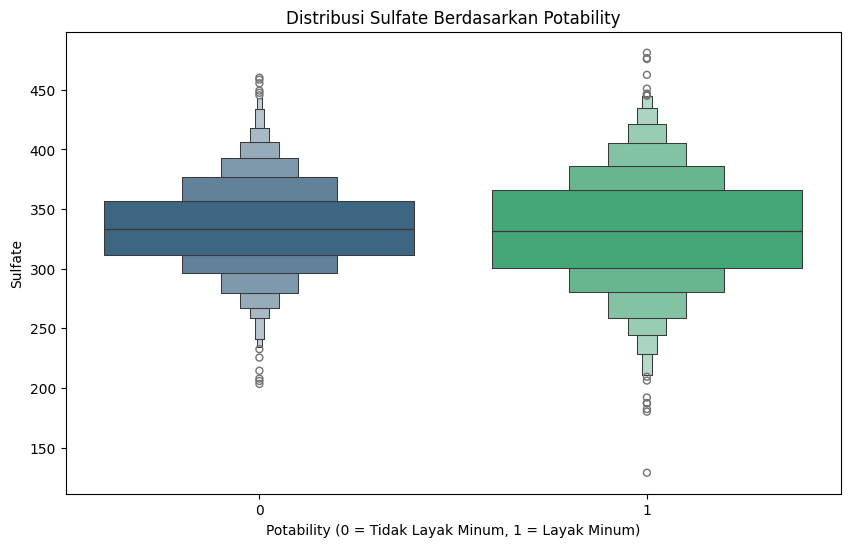

In [18]:
# Boxen plot Sulfate berdasarkan Potability
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Potability', y='Sulfate', data=data, palette='viridis')
plt.title('Distribusi Sulfate Berdasarkan Potability')
plt.xlabel('Potability (0 = Tidak Layak Minum, 1 = Layak Minum)')
plt.ylabel('Sulfate')
plt.show()

In [ ]:
# 6.1. Pemisahan Fitur (X) dan Target (Y)
X = data_clean.drop('Potability', axis=1)  # Fitur (semua kolom kecuali Potability)
Y = data_clean['Potability']  # Target (kolom Potability)

# 6.2. Membagi data menjadi data training dan testing (70% untuk training, 30% untuk testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 6.3. Inisialisasi dan Pelatihan Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 7.1. Melakukan prediksi pada data testing
Y_pred = rf_model.predict(X_test)

# 7.2. Menghitung akurasi model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Akurasi Model Random Forest: {accuracy * 100:.2f}%")

# 7.3. Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 7.4. Classification Report
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:")
print(class_report)

Akurasi Model Random Forest: 67.72%

Confusion Matrix:
[[298  57]
 [138 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       355
           1       0.66      0.45      0.53       249

    accuracy                           0.68       604
   macro avg       0.67      0.64      0.64       604
weighted avg       0.67      0.68      0.66       604

